# Analyse des Spotify Top 50 Datensatzes

## 2.1 Für welches Daten-Feld möchten Sie Vorhersagen treffen können?
    Ich möchte das Feld Popularity Vorhersagen können. Dazu brauche ich andere Spalten wie danceability, energy, key, loudness, mode, speechiness,   acousticness, instrumentalness liveness, valence und tempo.

## 2.2 Bestimmen Sie für jedes Feld einige relevanten statistischen
Informationen wie beispielsweise Median und Standardabweichung.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('Top_spotify_songs_first_1000_rows.xlsx')

# Beispiel für einige Spalten (ersetzen Sie diese durch Ihre gewünschten Spalten)
columns_to_analyze = ['popularity', 'danceability', 'energy', 'key' , 'loudness' , 'mode' , 'speechiness' , 'acousticness' , 'liveness' , 'valence' , 'tempo']

# Statistiken für jede Spalte berechnen
for column in columns_to_analyze:
    if pd.api.types.is_numeric_dtype(df[column]):
        median = df[column].median()
        std_dev = df[column].std()
        variance = df[column].var()
        
        print(f"\nStatistiken für {column}:")
        print(f"Median: {median}")
        print(f"Standardabweichung: {std_dev}")
        print(f"Varianz: {variance}")
    else:
        print(f"\n{column} ist keine numerische Spalte.")


Statistiken für popularity:
Median: 75.0
Standardabweichung: 15.627823076315064
Varianz: 244.2288541046056

Statistiken für danceability:
Median: 0.6825000000000001
Standardabweichung: 0.16383905242980035
Varianz: 0.02684323510109487

Statistiken für energy:
Median: 0.6365000000000001
Standardabweichung: 0.18778221392510172
Varianz: 0.035262159866612665

Statistiken für key:
Median: 6.0
Standardabweichung: 3.6679214162374545
Varianz: 13.453647515693373

Statistiken für loudness:
Median: -6.4215
Standardabweichung: 6.23738145440209
Varianz: 38.904927407719136

Statistiken für mode:
Median: 1.0
Standardabweichung: 0.4990186408360775
Varianz: 0.2490196039018861

Statistiken für speechiness:
Median: 0.05925
Standardabweichung: 0.08990129703951819
Varianz: 0.008082243209387682

Statistiken für acousticness:
Median: 0.2
Standardabweichung: 0.2624539280402617
Varianz: 0.06888206434376286

Statistiken für liveness:
Median: 0.131
Standardabweichung: 0.12333222302923613
Varianz: 0.0152108372373

## 2.3 Erstellen Sie mindestens eine Grafik, beispielsweise ein Histogramm für
## eines der Datenfelder oder eine Regression für mehrere Felder.

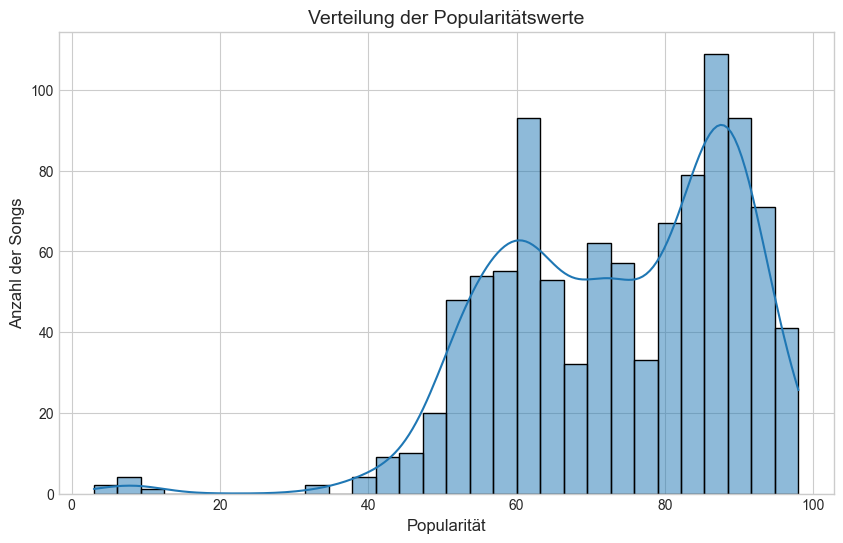

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten einlesen
df = pd.read_excel('Top_spotify_songs_first_1000_rows.xlsx')

# Besseres Erscheinungsbild für Plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Histogramm für Popularität
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Verteilung der Popularitätswerte', fontsize=14)
plt.xlabel('Popularität', fontsize=12)
plt.ylabel('Anzahl der Songs', fontsize=12)
plt.savefig('popularitaet_histogramm.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.4 Skalieren Sie mindestens ein Datenfeld; <br>oder argumentieren Sie in
 weiteren 50 bis 100 Wörtern in Ihrem Notizbuch, warum dies bei Ihrem
 Datensatz nicht sinnvoll ist.

In [5]:
import pandas as pd

# Daten einlesen
df = pd.read_excel('Top_spotify_songs_first_1000_rows.xlsx')

# Min-Max-Skalierung für Popularität
pop = df["popularity"]
df["popularity_normalised"] = (pop - pop.min()) / (pop.max() - pop.min())

# Min-Max-Skalierung für duration_ms
dur = df["loudness"]
df["loudness_normalised"] = (dur - dur.min()) / (dur.max() - dur.min())

# Beschreibende Statistik der normalisierten Daten anzeigen
print("Statistik der normalisierten Popularität:")
print(df["popularity_normalised"].describe())

print("\nStatistik der normalisierten Dauer:")
print(df["loudness_normalised"].describe())

# Die ersten 5 Zeilen mit Original- und normalisierten Werten anzeigen
print("\nVergleich der ersten 5 Zeilen:")
print(df[['popularity', 'popularity_normalised', 'loudness', 'loudness_normalised']].head())

Statistik der normalisierten Popularität:
count    999.000000
mean       0.744492
std        0.164503
min        0.000000
25%        0.610526
50%        0.757895
75%        0.884211
max        1.000000
Name: popularity_normalised, dtype: float64

Statistik der normalisierten Dauer:
count    998.000000
mean       0.841280
std        0.137548
min        0.000000
25%        0.835662
50%        0.875284
75%        0.907684
max        1.000000
Name: loudness_normalised, dtype: float64

Vergleich der ersten 5 Zeilen:
   popularity  popularity_normalised  loudness  loudness_normalised
0          98               1.000000    -7.777             0.845392
1          90               0.915789    -7.546             0.850486
2          92               0.936842    -7.001             0.862505
3          89               0.905263    -4.477             0.918164
4          96               0.978947   -10.171             0.792599
